In [541]:
import pandas as pd
df=pd.read_csv("E:\\Linear Test.csv")

In [542]:
df

,Area,Bed_Rooms,Noofchild,price
0,50,2,3,5000
1,60,3,4,6010
2,70,4,5,7000
3,80,5,6,8020
4,90,6,7,9000
5,10,1,1,1000
6,20,2,3,2030
7,30,3,4,3000
8,40,4,5,4000


In [543]:
data=df.values
data

array([[  50,    2,    3, 5000],
       [  60,    3,    4, 6010],
       [  70,    4,    5, 7000],
       [  80,    5,    6, 8020],
       [  90,    6,    7, 9000],
       [  10,    1,    1, 1000],
       [  20,    2,    3, 2030],
       [  30,    3,    4, 3000],
       [  40,    4,    5, 4000]], dtype=int64)

In [544]:
x=[]
for i in range(len(data[0])-1):
    x.append(df.iloc[:,i])
x

[0    50
 1    60
 2    70
 3    80
 4    90
 5    10
 6    20
 7    30
 8    40
 Name: Area, dtype: int64, 0    2
 1    3
 2    4
 3    5
 4    6
 5    1
 6    2
 7    3
 8    4
 Name: Bed_Rooms, dtype: int64, 0    3
 1    4
 2    5
 3    6
 4    7
 5    1
 6    3
 7    4
 8    5
 Name: Noofchild, dtype: int64]

In [545]:
target=df.iloc[:,-1]


In [546]:
import numpy as np
import copy 
def covariance(x,y):

    global covar1
    covar1=[]
    covar=0
    for i in range(len(data[0])-1):
        for j in range(len(df)):

            covar=((x[i][j])-x[i].mean())*(y[j]-y.mean())
            
            covar1.append(covar)
    
covariance(x,target)
sim=copy.deepcopy(covar1)
res=[]
for i in range(len(data[0])-1):
    res.append(sim[0:len(df)])
    del sim[0:len(df)]

real_covar1=[sum(i) for i in res]
real_covar1
print("Covariance:",real_covar1)

Covariance: [599800.0, 29990.000000000004, 33996.666666666664]


In [547]:
import numpy as np
def variance(x):
    
    global var1
    var1=[]    
    for i in range(len(data[0])-1):
        for j in range(len(df)):
            
            var=(((x[i][j])-x[i].mean())**2)
            var1.append(var)
    
variance(x)
sim_var1=copy.deepcopy(var1)
res_var1=[]
for i in range(len(data[0])-1):
    res_var1.append(sim_var1[0:len(df)])
    del sim_var1[0:len(df)]
real_var1=[sum(i) for i in res_var1]
print("variance:",real_var1)
    

variance: [6000.0, 20.0, 25.55555555555555]


In [548]:
m=[real_covar1[i]/real_var1[i] for i in range(len(real_var1))]
print("SLOPE:",m)

SLOPE: [99.96666666666667, 1499.5000000000002, 1330.3043478260872]


In [549]:
intercept=[]
for i in range(len(data[0])-1):
    c=((target.mean())-(m[i]*(x[i].mean())))
    intercept.append(c)
print("INTERCEPT:",intercept)

INTERCEPT: [8.33333333333394, 8.33333333333303, -610.1739130434789]


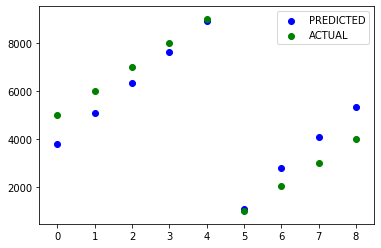

In [550]:
tar=[]
for i in range(len(x)):
    for j in range(len(df)):
        
        tar.append(m[i]*x[i][j]+intercept[i])
import copy 
fin_tar=copy.deepcopy(tar)


final=[]
for i in range(len(data[0])-1):
    final.append(fin_tar[0:len(df)])
    del fin_tar[0:len(df)]
pred1=[[row[i] for row in final] for i in range(len(df))]


pred=[(sum(i)/len(i)) for i in pred1]
from sklearn.metrics import r2_score
r2_score(pred,target)

c=[i for i in range(len(df))]
import matplotlib.pyplot as plt
plt.scatter(c,pred,color="blue",label="PREDICTED")
plt.scatter(c,target,color="green",label="ACTUAL")
plt.legend()